### **Import necessary libraries**

In [722]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, warnings, statsmodels.stats.api as sms, statsmodels.api as sm, scipy.stats as st
warnings.filterwarnings('ignore')

In [567]:
df_cust = pd.read_csv('data/customers.csv')
df_cs = pd.read_csv('data/credit_profiles.csv')
df_tran = pd.read_csv('data/transactions.csv')
df_credit = pd.read_csv('data/credit_profiles.csv')


### **Explore customers table**

In [568]:
df_cust.shape

(1000, 8)

In [569]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [570]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


#### Handle null values: annual income

In [571]:
df_cust.isna().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [572]:
df_cust[df_cust.annual_income.isna()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


We can manage these null values in a few ways:

1. Remove them: Since there are 50 missing values in a dataframe of 1000, removing them isn’t ideal as we don’t want to lose important records.
2. Replace them with mean or median: For income data, it's better to use the median because income often has outliers, and the median is more robust in such cases.
3. Replace them with median per occupation: Since income can vary based on occupation, using the median income for each occupation would be a better approach.

In [573]:
df_cust[df_cust.annual_income.notnull()].occupation.value_counts()

Business Owner         278
Freelancer             223
Data Scientist         167
Fullstack Developer    142
Consultant              89
Artist                  35
Accountant              16
Name: occupation, dtype: int64

In [574]:
occupation_wise_median = df_cust.groupby('occupation').annual_income.median()
occupation_wise_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [575]:
pd.isnull(df_cust['annual_income'][0])

False

In [576]:
df_cust['annual_income'] = df_cust.apply(lambda row: occupation_wise_median[row['occupation']] if pd.isna(row['annual_income']) else row['annual_income'], axis=1)
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married
...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26,City,Freelancer,46759.0,Married
996,997,Aarav Dhawan,Male,55,City,Business Owner,290061.0,Single
997,998,Rehan Jha,Male,29,City,Fullstack Developer,139141.0,Married
998,999,Amara Rathore,Female,47,City,Business Owner,261191.5,Married


In [577]:
df_cust.iloc[[82, 97]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,46759.0,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,261191.5,Married


Previously, the records at locations 82 and 97 had null values for annual income. Now we have the median income for each occupation instead of null values.

In [578]:
df_cust.isna().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

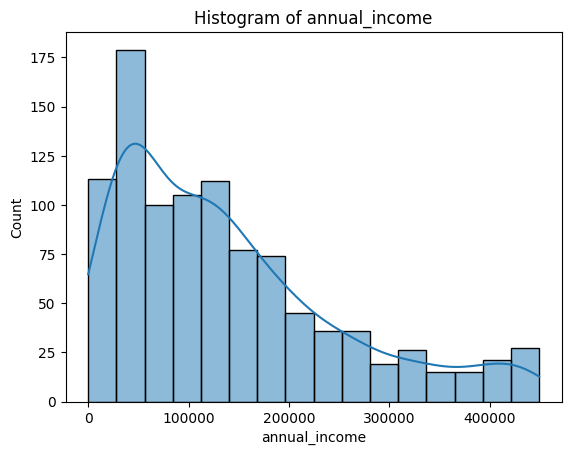

In [579]:
sns.histplot(df_cust['annual_income'], kde=True)
plt.title('Histogram of annual_income')
plt.show()

In [580]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


We have the following observations from the above data:

1. Age: Minimum = 1, Maximum = 135
2. Annual Income: Minimum = 2, Maximum = 447k

The Age column contains outliers. The Annual Income column also seems to have outliers in terms of the minimum value, as the business suggested that the minimum income should be at least 100.

#### Outlier detection: annual income

In [581]:
mean, std = df_cust['annual_income'].mean(), df_cust['annual_income'].std()
mean, std

(138916.7655, 110969.4086433663)

In [582]:
lower, upper = mean - 3*std, mean + 3*std
lower, upper

(-193991.4604300989, 471824.9914300989)

In [583]:
df_cust[df_cust['annual_income'] > upper]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


We have identified two outliers based on our statistical criterion of ±3 standard deviations. However, we don't always classify such points as outliers by default. It’s important to apply domain knowledge and sound judgment in these cases.

In this context, we can conclude that higher income values for business owners are reasonable and should be retained to maintain realistic data representation in our analysis.

On the lower end, however, we observed a minimum income of 2. Considering that the minimum income should ideally be at least 100, we can use this threshold to identify outliers on the lower end. These outliers may have resulted from data entry errors.









#### Outlier Treatment: Annual income

The records with incomes below $100 are identified as outliers. We have the following options to address them:

1. Remove Them: After discussing with the business team, we decided not to remove these records since they are valid customers, and we want to include them in our analysis.
2. Replace Them with Mean or Median: Since the mean is sensitive to outliers, it’s better to use the median for income values.
3. Replace Them with Occupation-Wise Median: Income levels can vary significantly based on occupation. For instance, the median income for a data scientist may differ from that of a business owner. Using occupation-wise median income for replacement would be a more appropriate approach.

In [584]:
df_cust[df_cust['annual_income']<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [585]:
occupation_wise_median = df_cust.groupby('occupation')['annual_income'].median()
occupation_wise_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [586]:
df_cust['annual_income'] = df_cust.apply(lambda row: occupation_wise_median[row['occupation']] if row['annual_income'] < 100 else row['annual_income'], axis=1)
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140483.548500
std,288.819436,15.666155,110463.002934
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


In [587]:
df_cust[df_cust['annual_income']<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [588]:
df_cust.loc[[262, 333]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,261191.5,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,135759.0,Married


The records at locations 262 and 333, which previously had annual incomes below $100, have now been replaced with the respective median income per occupation.

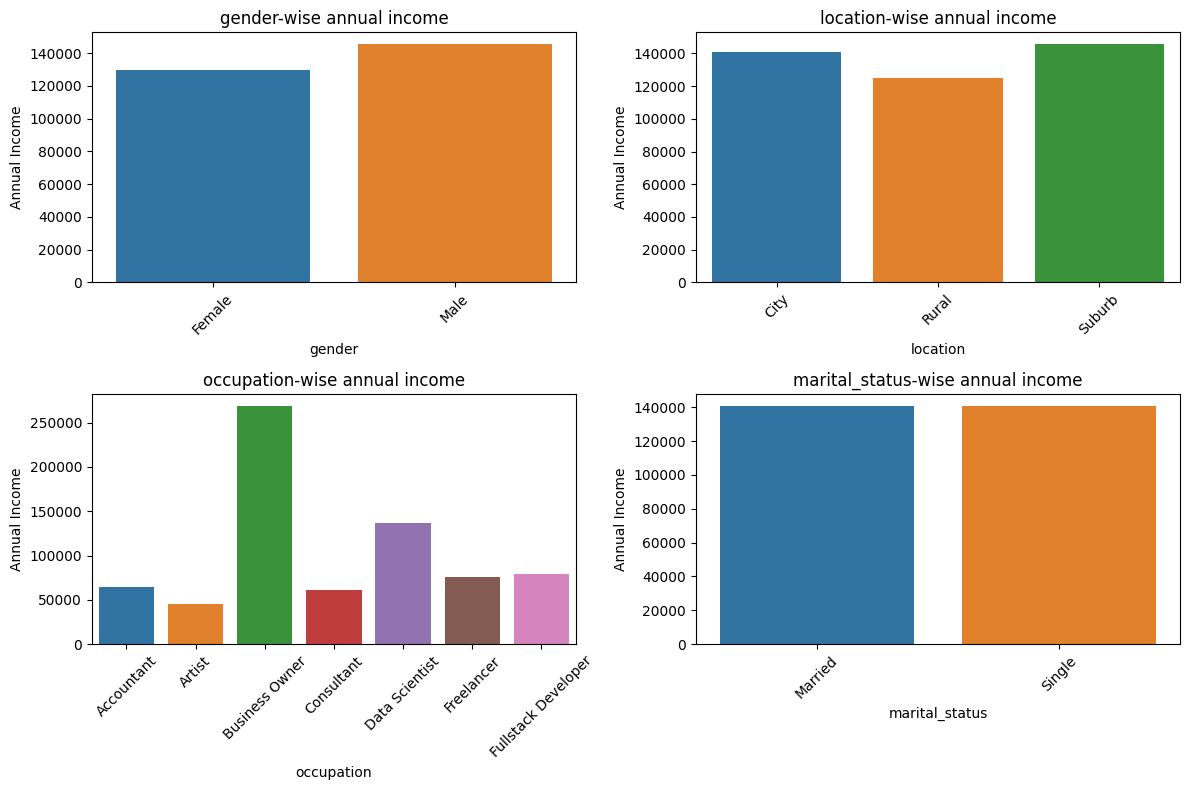

In [589]:
columns = ['gender', 'location', 'occupation', 'marital_status']
rows = (len(columns) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))

if rows == 1:
    axes = [axes]  

for i, column in enumerate(columns):
    row_idx, col_idx = divmod(i, 2)
    var_mean_analysis = df_cust.groupby(column)['annual_income'].mean().reset_index().set_index(column)

    sns.barplot(x=var_mean_analysis.index, y=var_mean_analysis['annual_income'], ax=axes[row_idx][col_idx])
    axes[row_idx][col_idx].set_xticklabels(axes[row_idx][col_idx].get_xticklabels(), rotation=45)
    axes[row_idx][col_idx].set_title(f'{column}-wise annual income')
    axes[row_idx][col_idx].set_xlabel(column)
    axes[row_idx][col_idx].set_ylabel('Annual Income')

if len(columns) % 2 != 0:
    fig.delaxes(axes[-1][-1])  

plt.tight_layout()
plt.show()

#### Analyze age column

#### Handle null values: age column

In [590]:
df_cust.age.isnull().sum()

0

There are no null values in the Age column, which means we don’t need to take any additional steps to handle missing data in this column.









In [591]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140483.548500
std,288.819436,15.666155,110463.002934
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


#### Outlier treatment: age

In [592]:
min_age = df_cust.age.min()
max_age = df_cust.age.max()

min_age, max_age

(1, 135)

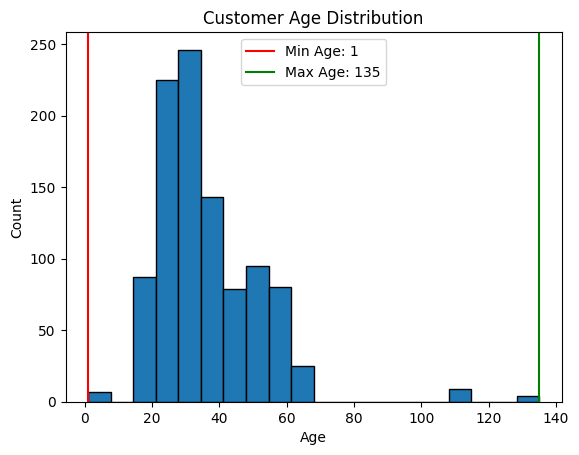

In [593]:
plt.hist(df_cust.age, bins=20, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Customer Age Distribution")

plt.axvline(min_age, color="red", label=f"Min Age: {min_age}")
plt.axvline(max_age, color="green", label=f"Max Age: {max_age}")

plt.legend()
plt.show()

Based on the observations, we will identify all customers who are above 80 and below 15 years of age.

In [594]:
outliers_age = df_cust[(df_cust['age'] < 15) | (df_cust['age'] > 80)]
outliers_age.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married


In [595]:
outliers_age.shape

(20, 8)

There are 20 outliers identified in the Age column. Here are the possible ways to handle them:

1. Remove Them: This may not be ideal since removing these records could result in losing valuable information.
2. Replace Outlier Values with an Appropriate Value: We can use the mean or median for replacement. 

In [596]:
df_cust.age.median()

32.0

In [597]:
df_cust[(df_cust['age'] > 15) & (df_cust['age'] < 80)].age.describe()

count    980.000000
mean      35.577551
std       12.305571
min       18.000000
25%       26.000000
50%       32.000000
75%       44.000000
max       64.000000
Name: age, dtype: float64

In [598]:
occupation_wise_age_mean = df_cust.groupby('occupation').age.mean().round(1)
occupation_wise_age_mean

occupation
Accountant             34.8
Artist                 28.2
Business Owner         49.7
Consultant             45.7
Data Scientist         33.2
Freelancer             25.2
Fullstack Developer    27.9
Name: age, dtype: float64

In [599]:
df_cust['age'] = df_cust.apply(lambda row: occupation_wise_age_mean[row['occupation']] if row['age'] < 15 or row['age'] > 80 else row['age'], axis=1)

In [600]:
df_cust[(df_cust['age'] < 15) | (df_cust['age'] > 80)].head(5)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [601]:
df_cust.age.describe()

count    1000.000000
mean       35.555300
std        12.259263
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

Now we don't have any outliers left. min age is 18 and max is 64.

In [602]:
df_cust.shape

(1000, 8)

In [603]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,49.7,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married


In [604]:
bins = [18, 25, 48, 65]
labels = ['18-25', '26-48', '49-65']

df_cust['age_group'] = pd.cut(df_cust['age'], bins=bins, labels=labels, include_lowest=True, right=False)

In [605]:
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,49.7,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,49-65
...,...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married,26-48
996,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,49-65
997,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,26-48
998,999,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married,26-48


In [606]:
age_groups = round(df_cust.age_group.value_counts(normalize=True)*100, 2).reset_index()

In [607]:
age_groups

,index,age_group
0,26-48,60.4
1,49-65,20.4
2,18-25,19.2


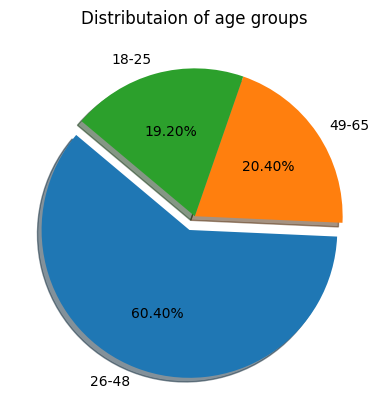

In [608]:
plt.pie(x=age_groups['age_group'], labels=age_groups['index'], autopct='%.2f%%', startangle=140, explode=(0.1, 0, 0), shadow=True)
plt.title('Distributaion of age groups')
plt.show()

In [609]:
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,49.7,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,49-65
...,...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married,26-48
996,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,49-65
997,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,26-48
998,999,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married,26-48


More than 50% of the customer base falls within the 26-48 age group, while approximately 26% are in the 18-25 age group.

#### Analyze Gender and Location Distribution

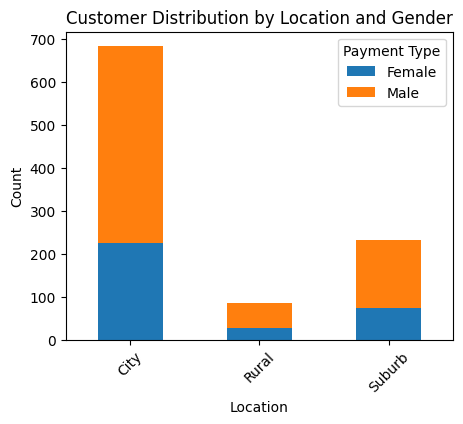

In [610]:
customer_location_gender = df_cust.groupby(['location', 'gender']).size().unstack(fill_value=0)

customer_location_gender.plot(kind='bar', stacked=True, figsize=(5, 4))

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Customer Distribution by Location and Gender')
plt.legend(title='Payment Type', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.show()


#### Explore credit score table

#### Remove duplicates 

In [611]:
df_credit.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [612]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cust_id                         1004 non-null   int64  
 1   credit_score                    1004 non-null   int64  
 2   credit_utilisation              1000 non-null   float64
 3   outstanding_debt                1000 non-null   float64
 4   credit_inquiries_last_6_months  1000 non-null   float64
 5   credit_limit                    935 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 47.2 KB


In [613]:
df_credit.shape

(1004, 6)

The dataframe contains 1004 rows, while the original customer dataframe had only 1000 rows. There might be invalid or duplicate data in df_credit.

In [614]:
{column : df_credit[column].duplicated().sum() for column in df_credit.columns}

{'cust_id': 4,
 'credit_score': 585,
 'credit_utilisation': 3,
 'outstanding_debt': 222,
 'credit_inquiries_last_6_months': 998,
 'credit_limit': 995}

In [615]:
df_credit[df_credit['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [616]:
df_credit.drop_duplicates(subset='cust_id', keep='last', inplace=True)

In [617]:
df_credit[df_credit['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [618]:
{column : df_credit[column].duplicated().sum() for column in df_credit.columns}

{'cust_id': 0,
 'credit_score': 581,
 'credit_utilisation': 0,
 'outstanding_debt': 219,
 'credit_inquiries_last_6_months': 995,
 'credit_limit': 991}

In [619]:
df_credit.shape

(1000, 6)

df_credit looks clean now after cleaning duplicates.

#### Handle null values

In [620]:
df_credit.isna().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

The Credit Limit column contains several null values that need to be addressed. Since as per domain knowledge, the credit limit depends on the credit score, we can explore the data to identify a possible mathematical relationship between the two. This relationship can then be used to fill the missing values in the Credit Limit column. Let's dive into the data and analyze this further!

In [621]:
df_credit[df_credit.credit_limit.isna()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [622]:
df_credit.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19235.561497
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1250.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


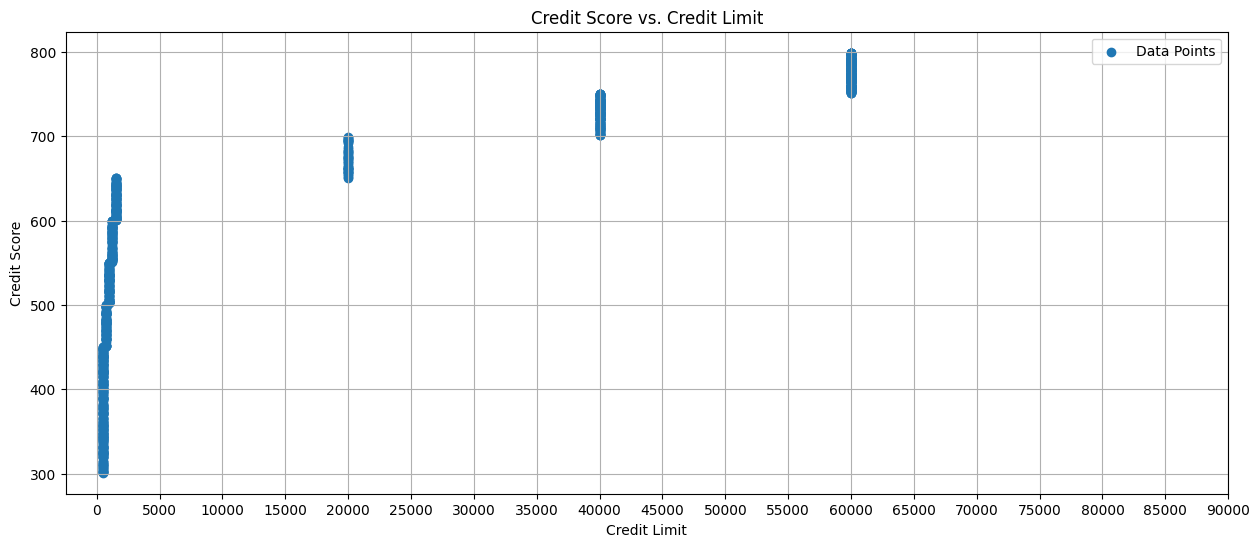

In [623]:
plt.figure(figsize=(15, 6))
plt.scatter(df_credit['credit_limit'], df_credit['credit_score'], marker='o', label='Data Points')
plt.title('Credit Score vs. Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')
plt.xticks(range(0, 90001, 5000))
plt.grid(True)
plt.legend()
plt.show()

In [624]:
bins = [i for i in range(300, 850, 50)]
labels = [f'{i}-{j-1}' for i, j in zip(bins, bins[1:])]
df_credit['credit_score_range'] = pd.cut(df_credit['credit_score'], bins=bins, labels=labels, include_lowest=True, right=False)
df_credit[df_credit['credit_score'] == 400]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
580,579,400,0.714743,280.0,1.0,500.0,400-449
588,587,400,0.246065,82.0,4.0,500.0,400-449
850,847,400,0.248915,79.0,3.0,500.0,400-449


In [625]:
df_credit['credit_score_range'].value_counts().sort_values()

650-699     46
350-399     66
300-349     76
550-599     80
450-499     82
400-449     95
500-549     95
600-649    105
700-749    142
750-799    213
Name: credit_score_range, dtype: int64

In [626]:
df_credit.isna().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
credit_score_range                 0
dtype: int64

In [627]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,49.7,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,49-65


In [628]:
merged_df_1 = df_cust.merge(df_credit, on='cust_id', how='inner')

In [629]:
merged_df_1[merged_df_1.credit_limit.isna()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
10,11,Krishna Singhania,Male,39.0,City,Accountant,77588.0,Married,26-48,679,0.557450,9187.0,2.0,NaN,650-699
35,36,Krishna Anand,Male,41.0,City,Business Owner,448699.0,Married,26-48,790,0.112535,4261.0,1.0,NaN,750-799
37,38,Ishan Mehrotra,Male,64.0,City,Business Owner,115498.0,Married,49-65,514,0.296971,238.0,2.0,NaN,500-549
45,46,Arya Bose,Male,39.0,City,Business Owner,251842.0,Single,26-48,761,0.596041,24234.0,2.0,NaN,750-799
64,65,Neha Gulati,Female,58.0,City,Business Owner,207709.0,Married,49-65,734,0.473715,13631.0,0.0,NaN,700-749


In [630]:
occupation_wise_credit_limit_mean = merged_df_1.groupby('credit_score_range')['credit_limit'].mean().round(2)
occupation_wise_credit_limit_mean

credit_score_range
300-349      500.00
350-399      500.00
400-449      500.00
450-499      740.26
500-549      994.25
550-599     1233.77
600-649     1492.50
650-699    18766.67
700-749    40000.00
750-799    59375.00
Name: credit_limit, dtype: float64

In [631]:
merged_df_1['credit_limit'] = merged_df_1.apply(lambda row: occupation_wise_credit_limit_mean[row['credit_score_range']] if pd.isna(row['credit_limit']) else row['credit_limit'], axis=1)

In [632]:
merged_df_1.isna().sum()

cust_id                           0
name                              0
gender                            0
age                               0
location                          0
occupation                        0
annual_income                     0
marital_status                    0
age_group                         0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
dtype: int64

In [633]:
merged_df_1[merged_df_1.credit_limit.isna()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range


In [634]:
merged_df_1.describe()

,cust_id,age,annual_income,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,35.555300,140483.548500,589.182000,0.498950,9683.597000,1.955000,19719.21078
std,288.819436,12.259263,110463.002934,152.284929,0.233139,25255.893671,1.414559,24696.34217
min,1.000000,18.000000,5175.000000,300.000000,0.103761,33.000000,0.000000,500.00000
25%,250.750000,26.000000,49620.500000,460.000000,0.293917,221.000000,1.000000,750.00000
50%,500.500000,32.000000,115328.000000,601.500000,0.487422,550.000000,2.000000,1492.50000
75%,750.250000,44.250000,195514.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000
max,1000.000000,64.000000,449346.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000


In [635]:
mode_df = merged_df_1.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_df

,credit_score_range,credit_limit
0,300-349,500.0
1,350-399,500.0
2,400-449,500.0
3,450-499,750.0
4,500-549,1000.0
5,550-599,1250.0
6,600-649,1500.0
7,650-699,20000.0
8,700-749,40000.0
9,750-799,60000.0


Here we can see, for the 750-799 credit score range, the typical credit limit is $60,000, while for the 300-449 range, it is $500. 

#### Handle outliers: outstanding_debt

In [636]:
merged_df_1.describe()

,cust_id,age,annual_income,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,35.555300,140483.548500,589.182000,0.498950,9683.597000,1.955000,19719.21078
std,288.819436,12.259263,110463.002934,152.284929,0.233139,25255.893671,1.414559,24696.34217
min,1.000000,18.000000,5175.000000,300.000000,0.103761,33.000000,0.000000,500.00000
25%,250.750000,26.000000,49620.500000,460.000000,0.293917,221.000000,1.000000,750.00000
50%,500.500000,32.000000,115328.000000,601.500000,0.487422,550.000000,2.000000,1492.50000
75%,750.250000,44.250000,195514.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000
max,1000.000000,64.000000,449346.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000


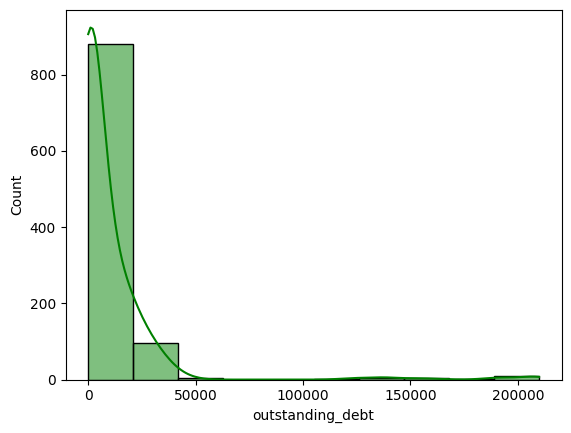

In [637]:
sns.histplot(merged_df_1['outstanding_debt'], bins=10, kde=True, color='g')
plt.show()

Upon reviewing the data, we observed that the maximum outstanding debt exceeds the maximum credit limit. According to domain knowledge, a customer's outstanding debt should not surpass their credit limit, as they are not permitted to exceed this limit.

Next, we should identify the number of such cases in the dataset to address these discrepancies.

<AxesSubplot:xlabel='outstanding_debt'>

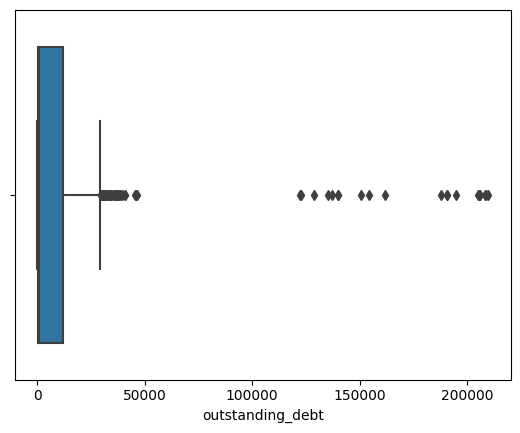

In [638]:
sns.boxplot(x=merged_df_1['outstanding_debt'])

Instead of relying on statistical methods like standard deviation or IQR, we will apply business knowledge to identify outliers. Specifically, any outstanding debt that exceeds the corresponding credit limit will be marked as an outlier.

In [639]:
q1, q3 = merged_df_1['outstanding_debt'].quantile([0.25, 0.75])
iqr = q3-q1
lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr 
lower, upper

(-17176.75, 29217.25)

In [640]:
merged_df_1[merged_df_1.outstanding_debt > merged_df_1.credit_limit].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,161644.0,2.0,1250.0,550-599
19,20,Dhruv Malhotra,Male,28.0,City,Artist,33377.0,Single,26-48,647,0.439132,205014.0,3.0,1500.0,600-649
25,26,Virat Shukla,Male,26.0,Rural,Freelancer,239099.0,Single,26-48,758,0.250811,190838.0,2.0,60000.0,750-799
38,39,Priya Tandon,Female,50.0,City,Business Owner,400804.0,Single,49-65,734,0.573023,122758.0,3.0,40000.0,700-749
93,94,Aahan Patel,Male,56.0,City,Business Owner,393253.0,Married,49-65,737,0.739948,137058.0,2.0,40000.0,700-749


In [641]:
merged_df_1['outstanding_debt'] = merged_df_1.apply(
    lambda row : 
    row['credit_limit'] 
    if row['outstanding_debt'] > row['credit_limit'] 
    else 
    row['outstanding_debt'], axis=1)

In [642]:
merged_df_1[merged_df_1.outstanding_debt > merged_df_1.credit_limit].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range


All identified outliers in the Outstanding Debt column have now been removed.

#### Visualizing Correlation in Credit Score Table

In [643]:
merged_df_1.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,Manya Acharya,Female,49.7,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,49-65,708,0.586151,18090.0,2.0,40000.0,700-749


In [644]:
merged_df_1.describe()

,cust_id,age,annual_income,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,35.555300,140483.548500,589.182000,0.498950,6850.084000,1.955000,19719.21078
std,288.819436,12.259263,110463.002934,152.284929,0.233139,10683.473561,1.414559,24696.34217
min,1.000000,18.000000,5175.000000,300.000000,0.103761,33.000000,0.000000,500.00000
25%,250.750000,26.000000,49620.500000,460.000000,0.293917,221.000000,1.000000,750.00000
50%,500.500000,32.000000,115328.000000,601.500000,0.487422,541.500000,2.000000,1492.50000
75%,750.250000,44.250000,195514.250000,738.000000,0.697829,10924.500000,3.000000,40000.00000
max,1000.000000,64.000000,449346.000000,799.000000,0.899648,60000.000000,4.000000,60000.00000


In [645]:
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 'annual_income','age']

correlation_matrix = merged_df_1[numerical_cols].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847985,0.575751,0.444819
credit_utilisation,-0.070445,1.000000,0.192838,-0.080500,-0.086368,-0.027381
outstanding_debt,0.680654,0.192838,1.000000,0.810616,0.555661,0.444107
credit_limit,0.847985,-0.080500,0.810616,1.000000,0.684770,0.510721
annual_income,0.575751,-0.086368,0.555661,0.684770,1.000000,0.618083
age,0.444819,-0.027381,0.444107,0.510721,0.618083,1.000000


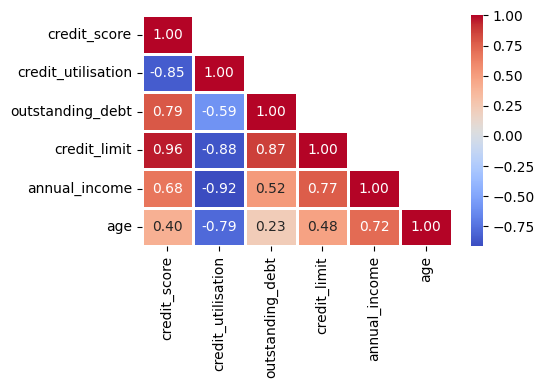

In [688]:
plt.figure(figsize=(5, 3))
nm_cols = correlation_matrix.select_dtypes(include='number').columns
sns.heatmap(correlation_matrix[nm_cols].corr(), mask=np.triu(np.ones_like(correlation_matrix[nm_cols].corr(), dtype=bool), k=1), cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.8)
plt.show()

Here, we can observe a strong correlation of approximately 0.85 between credit limit and credit score, as well as a high correlation between credit limit and annual income.

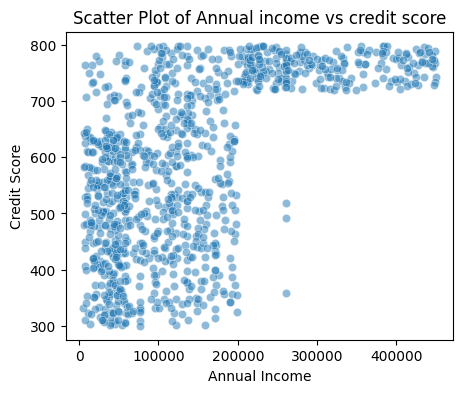

In [647]:
# Just looking if there is any relation between annual_income and credit score
plt.figure(figsize=(5, 4))
sns.scatterplot(x='annual_income', y='credit_score', data=merged_df_1, alpha=0.5)
plt.title('Scatter Plot of Annual income vs credit score')
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.show()

Here, no clear pattern observed

### **Explore transactions table**

In [648]:
print(df_tran.shape)
df_tran.head()

(500000, 7)


,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [649]:
for col in df_tran.columns:
    print(col, df_tran[col].duplicated().sum())

tran_id 0
cust_id 499000
tran_date 499752
tran_amount 484725
platform 499992
product_category 499991
payment_type 499994


#### Handle null values: platform column

In [650]:
df_tran.isna().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

The Platform column has many missing values. Let's explore these further to understand the issue and decide how best to handle them.

In [651]:
df_tran[df_tran.platform.isna()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


In [652]:
df_tran.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [653]:
df_tran.platform.value_counts()

Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: platform, dtype: int64

In [654]:
df_tran.product_category.unique()

array(['Electronics', 'Fashion & Apparel', 'Sports', 'Kitchen Appliances',
       'Beauty & Personal Care', 'Garden & Outdoor', 'Books',
       'Home Decor', 'Toys & Games'], dtype=object)

In [655]:
grp_prod_plat = df_tran.groupby(['product_category', 'platform'])['platform'].count().reset_index(name='count')
grp2 = grp_prod_plat.groupby('product_category')['count'].max().reset_index()
grp3 = grp_prod_plat[(grp_prod_plat['product_category'].isin(grp2['product_category'])) & (grp_prod_plat['count'].isin(grp2['count']))].reset_index().drop(['index'], axis=1)[['product_category', 'platform']]

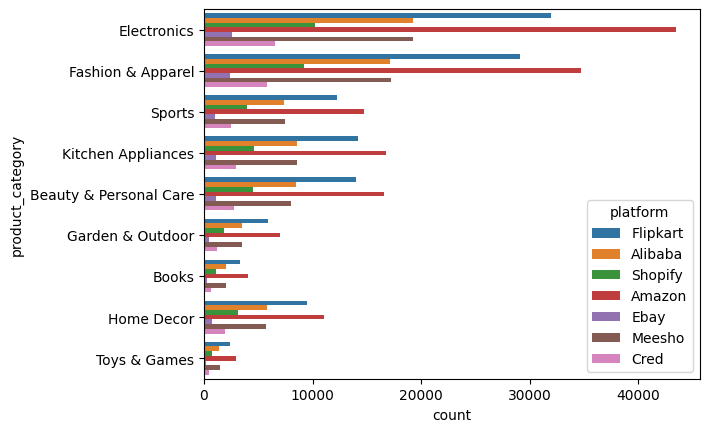

In [656]:
sns.countplot(y = df_tran.product_category, hue= df_tran.platform)
plt.show()

The above chart shows that Amazon is the most commonly used platform across all product categories. So, to handle the null values in the Platform column, we can replace them with "Amazon" since it’s the most frequently used platform.

In [657]:
df_tran.columns

Index(['tran_id', 'cust_id', 'tran_date', 'tran_amount', 'platform',
       'product_category', 'payment_type'],
      dtype='object')

In [658]:
df_grp = df_tran.groupby(['product_category', 'platform'])['platform'].count().reset_index(name='count')
df_grp_2 = df_grp.groupby('product_category')['count'].max().reset_index()
df_grp_3 = df_grp[(df_grp['product_category'].isin(df_grp_2['product_category'])) & (df_grp['count'].isin(df_grp_2['count']))].reset_index().drop(['index'], axis=1)[['product_category', 'platform']]
final_out = df_grp_3.set_index('product_category')['platform']
final_out

product_category
Beauty & Personal Care    Amazon
Books                     Amazon
Electronics               Amazon
Fashion & Apparel         Amazon
Garden & Outdoor          Amazon
Home Decor                Amazon
Kitchen Appliances        Amazon
Sports                    Amazon
Toys & Games              Amazon
Name: platform, dtype: object

In [659]:
df_tran['platform'] = df_tran.apply(
    lambda row : 
    final_out[row['product_category']] 
    if pd.isna(row['platform'])
    else row['platform'], axis=1
    )

In [660]:
df_tran.loc[[355, 418]]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,Amazon,Electronics,Net Banking
418,419,383,2023-01-01,338,Amazon,Electronics,Credit Card


In [661]:
df_tran.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

Now, we have successfully addressed all nul values.

#### Treat outliers: tran_amount

In [662]:
df_tran.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


There are some transactions with an amount of 0, which appear to be invalid entries.

In [663]:
df_tran[df_tran.tran_amount == 0].head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [664]:
df_tran[df_tran.tran_amount == 0].shape

(4734, 7)

It seems that all zero transactions occur when:

- Platform = Amazon
- Product Category = Electronics
- Payment Type = Credit Card

To handle these, we'll identify other transactions within this group and calculate their median to replace the zero values. We'll use the median instead of the mean to avoid skewing the data due to outliers.

In [665]:
tran_median = df_tran.groupby(['product_category', 'payment_type'])['tran_amount'].median().reset_index().set_index(['product_category', 'payment_type'])

In [666]:
tran_median.head(10)

tran_amount
product_category       payment_type             
Beauty & Personal Care Cash                 31.0
                       Credit Card          99.0
                       Debit Card           98.0
                       Gpay                 97.0
                       Net Banking          98.0
                       Phonepe              97.0
Books                  Cash                 30.0
                       Credit Card          30.0
                       Debit Card           31.0
                       Gpay                 31.0

In [667]:
tran_median.loc['Electronics', 'Credit Card']['tran_amount']

472.0

In [668]:
df_tran['tran_amount'] = df_tran.apply(
    lambda row:
    tran_median.loc[row['product_category'], row['payment_type']]['tran_amount']
    if row['tran_amount'] == 0
    else row['tran_amount'],
    axis=1
)

In [669]:
df_tran[df_tran.tran_amount == 0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


Now, no zero values are left in tran_amount column.

In [670]:
df_tran.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3229.676226
std,144337.711635,288.641924,13097.722128
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


<AxesSubplot:xlabel='tran_amount', ylabel='Count'>

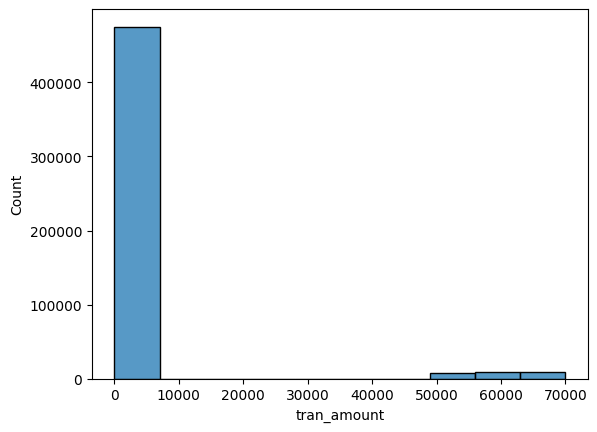

In [671]:
sns.histplot(df_tran['tran_amount'], bins=10)

In [672]:
q1, q3 = df_tran['tran_amount'].quantile([0.25, 0.75])
iqr = q3-q1
lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr 
lower, upper

(-454.5, 933.5)

In [673]:
df_grp_prod_tran = df_tran[df_tran['tran_amount'] <= upper].groupby('product_category')['tran_amount'].mean()

In [674]:
df_tran['tran_amount'] = df_tran.apply(
    lambda row:
    df_grp_prod_tran[row['product_category']]
    if row['tran_amount'] > upper
    else
    row['tran_amount'], axis=1
)

In [675]:
df_tran[df_tran['tran_amount'] >= upper]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [676]:
df_tran.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,231.351654
std,144337.711635,288.641924,223.392760
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,64.553463
50%,250000.500000,502.000000,133.000000
75%,375000.250000,752.000000,349.000000
max,500000.000000,1000.000000,933.000000


Now, the outliers in the tran_amount column have now been successfully addressed.

<AxesSubplot:xlabel='tran_amount', ylabel='Count'>

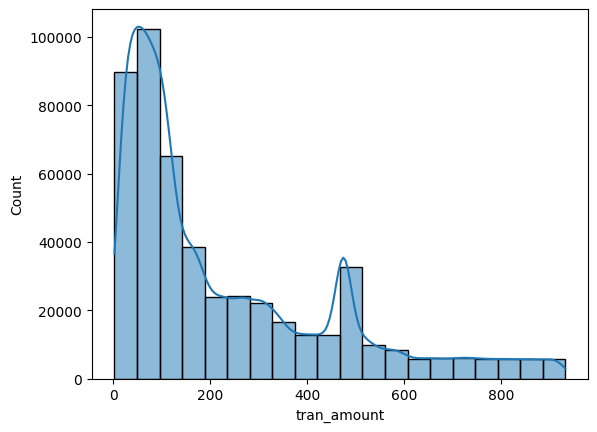

In [677]:
sns.histplot(x='tran_amount', data=df_tran, bins=20, kde=True)

The histogram of transactions after outlier removal shows a right-skewed distribution, with most transaction amounts now falling below $1000.









### **Payment type distribution**

In [678]:
new_merged_df = merged_df_1.merge(df_tran, on='cust_id', how='inner')

In [679]:
new_merged_df.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,49.7,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700-749,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,49.7,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700-749,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,49.7,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700-749,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,49.7,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700-749,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,49.7,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700-749,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


In [680]:
new_merged_df.columns

Index(['cust_id', 'name', 'gender', 'age', 'location', 'occupation',
       'annual_income', 'marital_status', 'age_group', 'credit_score',
       'credit_utilisation', 'outstanding_debt',
       'credit_inquiries_last_6_months', 'credit_limit', 'credit_score_range',
       'tran_id', 'tran_date', 'tran_amount', 'platform', 'product_category',
       'payment_type'],
      dtype='object')

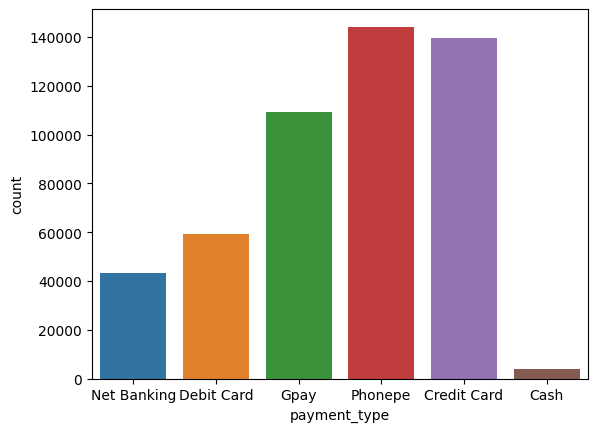

In [685]:
sns.countplot(x=new_merged_df.payment_type)
plt.show()

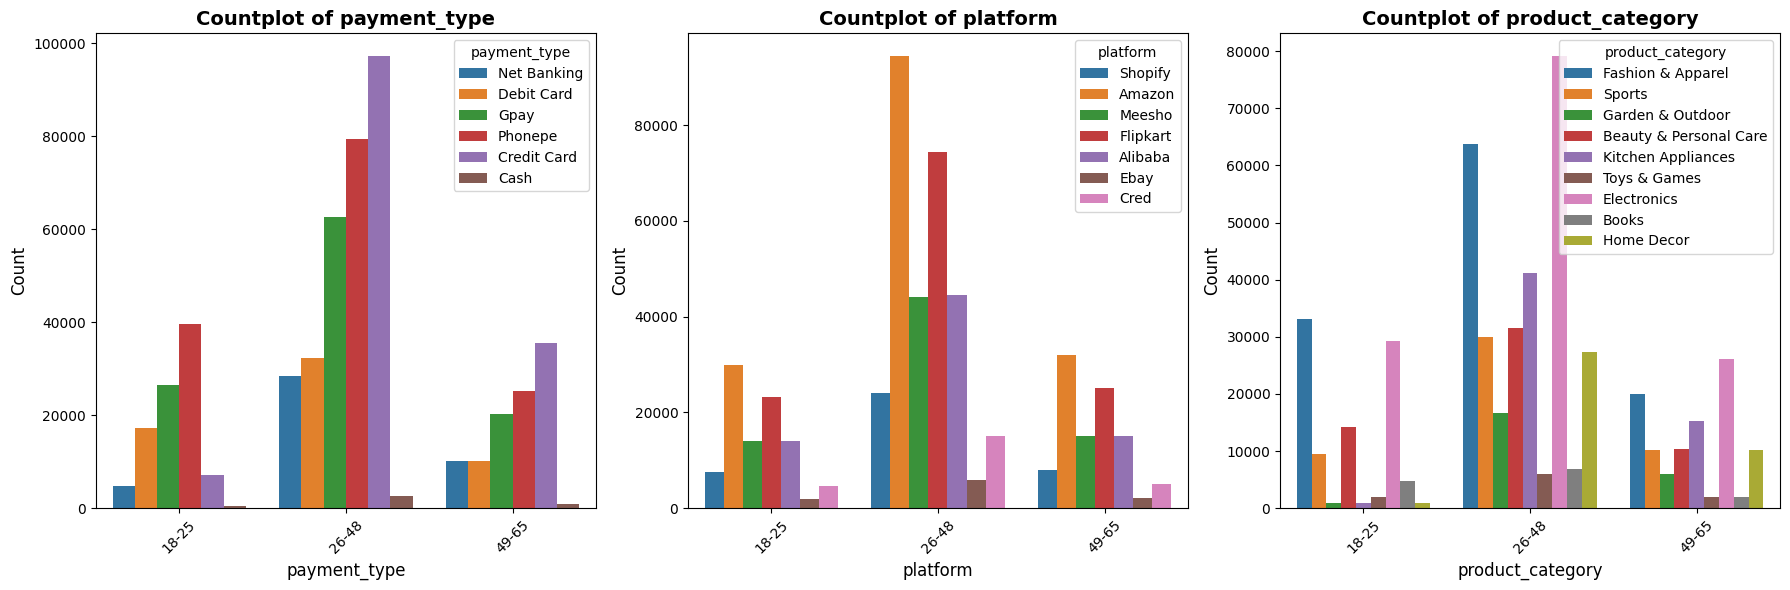

In [ ]:
cols = ['payment_type', 'platform', 'product_category']

fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(18, 6))

for i, col in enumerate(cols):
    sns.countplot(x=new_merged_df['age_group'], hue=new_merged_df[col], ax=axes[i])
    axes[i].set_title(f"Countplot of {col}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Observations**
1. The 18-25 age group has less exposure to credit cards compared to other age groups.
2. The top 3 purchasing categories for this age group are Electronics, Fashion & Apparel, and Beauty & Personal Care.
3. The most popular platforms for this group are Amazon, Flipkart, and Alibaba.

#### Visualize average transaction amount

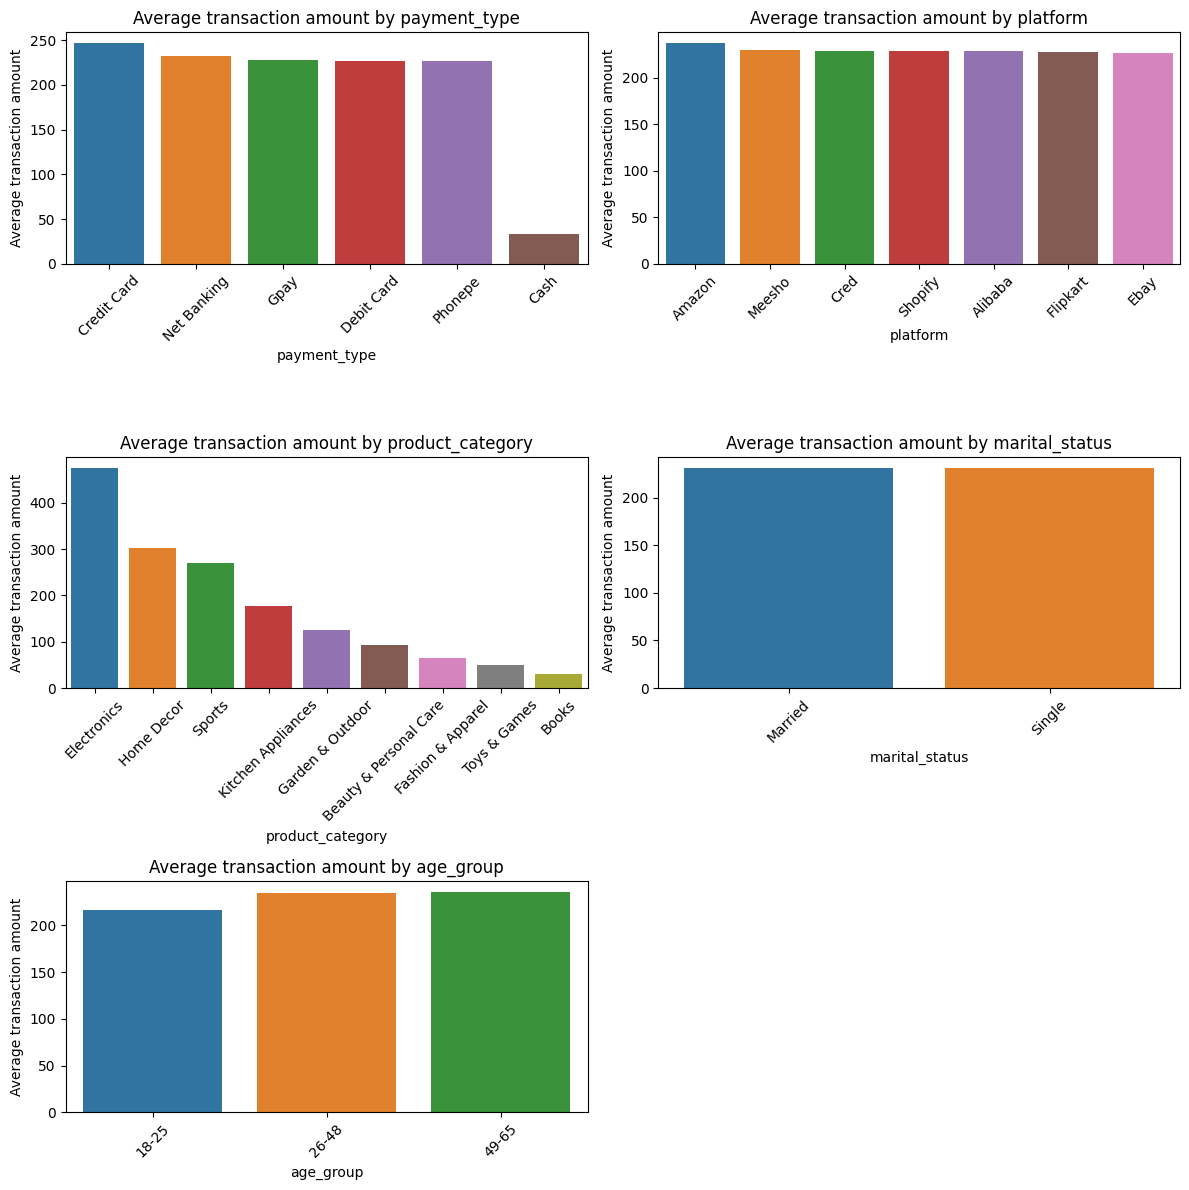

In [696]:
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']
num_rows = 3

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
axes = axes.flatten()

for i, cat_col in enumerate(cat_cols):
    avg_tran_amount_by_category = new_merged_df.groupby(cat_col)['tran_amount'].mean().reset_index()
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)

    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### **Further Analysis on Age Group**

Now, we conduct a deeper analysis to examine key metrics for different age groups, such as average income, credit limit, credit score, etc.

In [697]:
plt_ = new_merged_df.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score', 'outstanding_debt']].mean()
plt_

,annual_income,credit_limit,credit_score,outstanding_debt
age_group,,,,
18-25,35790.154131,886.493503,482.089215,313.556731
26-48,135951.427270,18921.548165,588.129969,6193.059744
49-65,253282.105304,40013.691919,694.604159,15000.171450


In [698]:
plt_.shape[0]

3

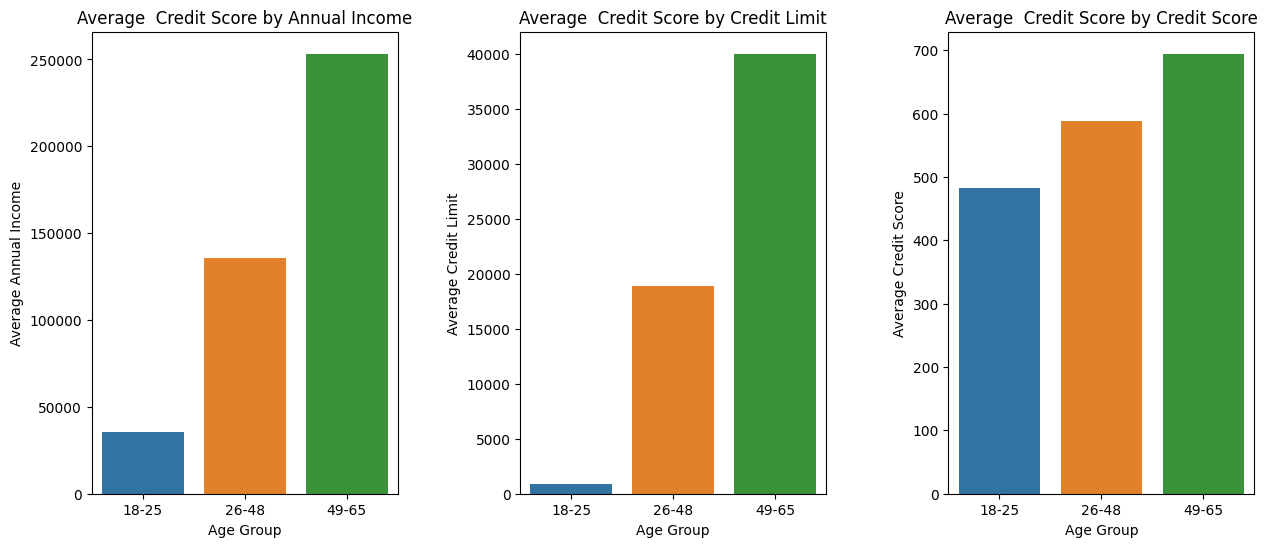

In [710]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))  
axes = ax.flatten()
cols = ['annual_income', 'credit_limit', 'credit_score']

for i in range(len(cols)):  
    sns.barplot(x=plt_.index, y=plt_[cols[i]], ax=axes[i])
    axes[i].set_title(f'Average  Credit Score by {cols[i].replace("_", " ").title()}')  
    axes[i].set_xlabel('Age Group')
    axes[i].set_ylabel(f'Average {cols[i].replace("_", " ").title()}')

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()


### **Finalize target market for a trial credit card launch**

**Targeting untapped market**

1. 18-25 age group makes up approximately 26% of the customer base.
2. Their average annual income is less than $50K.
3. This group generally has limited credit history, which reflects in their credit score and credit limit.
4. Their credit card usage is relatively low compared to other age groups.
5. The top 3 shopping categories for this group are Electronics, Fashion & Apparel, and Beauty & Personal Care.

### **Pre-Campaign**

To conduct a trial run for our new credit card, we need to determine the sample size required for A/B testing.

We'll create a control group and a test group, and the required sample size will be calculated based on:

1. Statistical Power (the probability of detecting a true effect)
2. Effect Size (the expected impact or difference between groups)

In [712]:
alpha = 0.05
power = 0.8
effect_size=0.2

sms.tt_ind_solve_power(
    effect_size=0.2, 
    alpha=alpha, 
    power=power, 
    ratio=1, 
    alternative='two-sided'
)

393.40569300025135

For an effect size of 2, we require 393 customers.

Since budget constraints are a factor, we'll explore sample sizes for different effect sizes. This will help us identify an optimal sample size that balances cost-efficiency and statistical reliability.

In [713]:
effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5,1]

for effect_size in effect_sizes:
    sample_size = sms.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')
    print(f"Effect Size: {effect_size}, Required Sample Size: {int(sample_size)} customers")

Effect Size: 0.1, Required Sample Size: 1570 customers
Effect Size: 0.2, Required Sample Size: 393 customers
Effect Size: 0.3, Required Sample Size: 175 customers
Effect Size: 0.4, Required Sample Size: 99 customers
Effect Size: 0.5, Required Sample Size: 63 customers
Effect Size: 1, Required Sample Size: 16 customers


Let's say, based on requirements, the test should be capable of detecting a minimum difference of 0.4 standard deviations between the control and test groups. For an effect size of 0.4, we need 100 customers. Let's consider 100 customers is acceptable within their budget constraints for this trial run.

**Forming control and test groups**

1. We have identified approximately 246 customers within the age group of 18 to 25. From this pool, we will select 100 customers for the initial campaign launch.

2. The campaign will be launched for 100 customers, as determined by the effect size calculation and budget considerations, and will run for a duration of two months.

3. The campaign achieved a conversion rate of approximately 40%, meaning 40 out of 100 customers in the test group started using the credit card.

4. To maintain a similar sample size, a control group consisting of 40 customers will be created. Importantly, this control group will be entirely separate from the initial 100 customers in the test group.

5. As a result, we now have 40 customers in both the control and test groups.


**Let's say, at the end of the two-month campaign period, we obtained daily data showing the average transaction amounts made by the 40 customers in both the control and test groups, using existing and newly launched credit cards, respectively.**

**The key performance indicator (KPI) for this A/B test is to improve the average transaction amounts facilitated by the new card.**

### **Post-campaign**

#### Hypothesis testing

**Hypothesis**

- **Null Hypothesis (H₀)**: There is no significant improvement in the average transaction amount with the new credit card.
- **Alternative Hypothesis (Hₐ)**: The average transaction amount for the test group is greater than that of the control group.

#### Two sample Z test for hypothesis testing

In [714]:
df = pd.read_csv('data/data_after_campaign/avg_transactions_after_campaign.csv')
df.head()

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,251.02,401.78
1,2023-09-11,250.77,326.16
2,2023-09-12,248.81,303.92
3,2023-09-13,255.90,363.29
4,2023-09-14,255.86,317.06


In [715]:
df.shape

(62, 3)

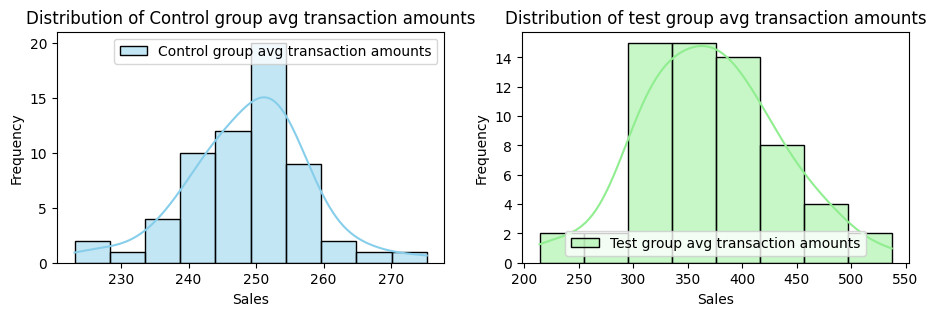

In [716]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))

sns.histplot(df['control_group_avg_tran'], kde=True, color='skyblue', label='Control group avg transaction amounts', ax=ax1)
ax1.set_xlabel('Sales')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Control group avg transaction amounts')
ax1.legend()

sns.histplot(df['test_group_avg_tran'], kde=True, color='lightgreen', label='Test group avg transaction amounts', ax=ax2)
ax2.set_xlabel('Sales')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of test group avg transaction amounts')
ax2.legend()

plt.show()

#### Perform hypothesis testing using 2 sample Z-test

In [717]:
control_mean = df["control_group_avg_tran"].mean().round(2)
control_std = df["control_group_avg_tran"].std().round(2)
control_mean, control_std

(248.94, 9.14)

In [718]:
test_mean = df["test_group_avg_tran"].mean().round(2)
test_std = df["test_group_avg_tran"].std().round(2)
test_mean, test_std

(370.54, 63.25)

In [719]:
sample_size = df.shape[0]
sample_size

62

#### Test using rejection region (i.e. critical Z value)

In [720]:
a = (control_std**2/sample_size)
b = (test_std**2/sample_size)

Z_score = (test_mean-control_mean)/np.sqrt(a+b)
Z_score

14.982390916086468

In [723]:
critical_z_value = st.norm.ppf(1 - alpha)
critical_z_value

1.6448536269514722

In [724]:
Z_score > critical_z_value

True

Since the Z-score is higher than the critical Z-value, we can reject the null hypothesis.

#### Test using p-value

In [725]:
p_value = 1 - st.norm.cdf(Z_score)
p_value

0.0

In [726]:
p_value < alpha

True

Since the p-value is less than the significance level (i.e., alpha), we can reject the null hypothesis.

### **Conclusion**
Based on the findings, we can launch the credit card exclusively in the market for the 18–25 age group.